In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pickle
from utils_decentralized import *
import os
from copy import deepcopy
from scipy.stats import beta
from collections import OrderedDict

### Evaluation of Decentralized Thompson Sampling for different network topologies

#### Experiment Names:

Experiment number 1: 3 arms with Bernoulli mean [0.1, 0.2, 0.5]

Experiment number 2: 17 arms with Bernoulli mean [0.5, 0.1, ...., 0.1]

Experiment number 3: 4 arms with Bernoulli mean [0.2646, 0.6135, 0.8950, 0.5764]

##### Network Topologies considered:

cycle (3 regular graph with self loops)

5 regular graph with self loops

grid

complete


In [2]:
# Parameters for run-time
max_iter = 800
runs = 1200

# Parameters for underlying MAB model
exp_num = 3
#theta = np.array([0.1, 0.2, 0.5]) # experiment 1
#theta = np.array([0.5] + [0.1] * 16) # experiment 2
theta = np.array([0.2646, 0.6135, 0.8950, 0.5764]) # experiment 3
num_arms = len(theta)

# Parameters for Thompson Sampling
alpha_vec = np.ones(num_arms)
beta_vec = np.ones(num_arms)

In [3]:
N = 64

# Parameters for storing regret for each strategy
avg_cumm_regret = OrderedDict()

In [4]:
W = compute_W(N, type='cycle')
avg_cumm_regret['ts_N64_cycle'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N64_cycle'] = run_MultiAgent_TS(max_iter, runs, W, alpha_vec, beta_vec, theta, exp_num, 'cycle', save = True, rerun=False)

Saved file was loaded


In [5]:
W = compute_W(N, type='5regular')
avg_cumm_regret['ts_N64_5regular'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N64_5regular'] = run_MultiAgent_TS(max_iter, runs, W, alpha_vec, beta_vec, theta, exp_num, '5regular', save = True, rerun=False)

Saved file was loaded


In [6]:
W = compute_W(N, type='grid')
avg_cumm_regret['ts_N64_grid'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N64_grid'] = run_MultiAgent_TS(max_iter, runs, W, alpha_vec, beta_vec, theta, exp_num, 'grid', save = True, rerun=False)

Saved file was loaded


In [7]:
W = compute_W(N, type='complete')
avg_cumm_regret['ts_N64_complete'] = np.zeros((max_iter+1))
avg_cumm_regret['ts_N64_complete'] = run_MultiAgent_TS(max_iter, runs, W, alpha_vec, beta_vec, theta, exp_num, 'complete', save = True, rerun=False)

Saved file was loaded


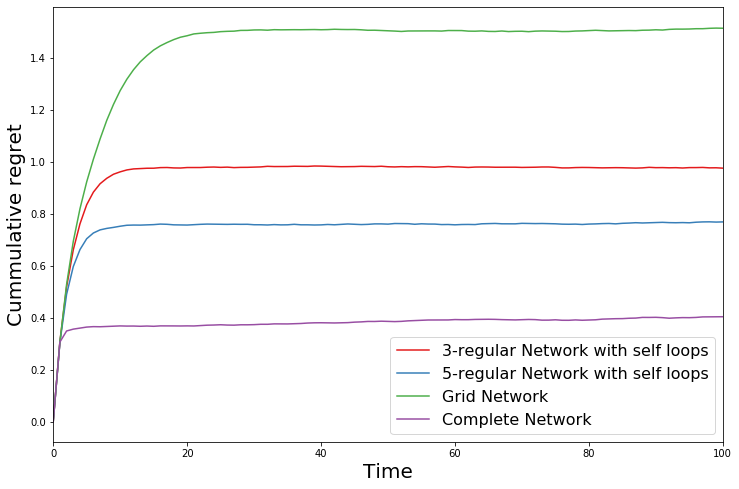

In [8]:
plt.figure(figsize=(12,8))

cycle_plot, = plt.plot(avg_cumm_regret['ts_N64_cycle'], color='#e41a1c', label = r"3-regular Network with self loops")
regular_plot, = plt.plot(avg_cumm_regret['ts_N64_5regular'], color='#377eb8', label = r"5-regular Network with self loops")
grid_plot, = plt.plot(avg_cumm_regret['ts_N64_grid'], color='#4daf4a', label = r"Grid Network")
complete_plot, = plt.plot(avg_cumm_regret['ts_N64_complete'], color='#984ea3', label = r"Complete Network")

plt.xlim(0,100)
plt.xlabel("Time", fontsize = 20)
plt.ylabel(r"Cummulative regret", fontsize = 20)
plt.legend(handles=[cycle_plot, regular_plot, grid_plot, complete_plot], loc='lower right', fontsize = 16)
#plt.title("Cumulative Regret Over Time")
filename = 'results_N{}_T{}_NetworkTopology_BerExp{}.pdf'.format(N, max_iter, exp_num)
plt.savefig(filename, bbox_inches='tight')
plt.show()